In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
read_windows = 0

if read_windows == False:
    covid19data = pd.read_csv("covid19-global-forecasting-week-2/data/train.csv")

    WHS = pd.read_csv("covid19-global-forecasting-week-2/data/2.12_Health_systems.csv")
else:
    covid19data = pd.read_csv("train.csv")
    WHS = pd.read_csv("2.12_Health_systems.csv")



In [3]:
data = covid19data.query("Date>'2020-01-22'and Date<='2020-03-27'")
target_value = covid19data.query("Date >= '2020-03-28'")


timestamps = []
countries = []
provinces = []
confirmed_cases = []
fatalities = []

vector_df = pd.DataFrame(columns=["Country_Region", "Province_State", "Confirmed_Cases_X", "Fatalities_X"])

for country in data.Country_Region.unique():
    for province in data.query(f'Country_Region=="{country}"').Province_State.unique():
        countries.append(country)
        provinces.append(province)
        if str(province) == "nan":
            temp_df = data.query(f'Country_Region=="{country}"')
        else:
            temp_df = data.query(f'Country_Region=="{country}" and Province_State =="{province}"')
        confirmed_cases.append([float(x) for x in temp_df["ConfirmedCases"]])
        fatalities.append([float(x) for x in temp_df["Fatalities"]])
        #print(country, province, len(temp_df))
        
vector_df.Country_Region = countries
vector_df.Province_State = provinces
vector_df.Confirmed_Cases_X = confirmed_cases 
vector_df.Fatalities_X = fatalities; vector_df.head(5)


#clearing duplicated regions
for i, value in vector_df.iterrows():
    if len(value.Confirmed_Cases_X) > 65:
        vector_df = vector_df.drop(i)

# for i, value in vector_df.iterrows():
#     print(value.Country_Region, len(value.Fatalities_X))
    


In [4]:
temp_df = vector_df.copy().drop("Fatalities_X", axis=1) ; temp_df.head(5)

,Country_Region,Province_State,Confirmed_Cases_X
0,Afghanistan,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Albania,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Algeria,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Andorra,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Angola,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [5]:
list_of_cases_dicts = []


for i, region in temp_df.iterrows():
    #print(region.Country_Region)
    #print(region.Province_State)
    cases_dict = {}
    nday = 1
    cases_dict["World_Bank_Name"] = region.Country_Region
    cases_dict["Province_State"] = region.Province_State
    for value in region.Confirmed_Cases_X:
        cases_dict[f"day_{nday}"] = value
        nday +=1
    list_of_cases_dicts.append(cases_dict)
    
#print(list_of_cases_dicts)

Cases_df = pd.DataFrame(list_of_cases_dicts) 
print(Cases_df.shape); Cases_df.head(5)


(290, 67)


,Province_State,World_Bank_Name,day_1,day_10,day_11,day_12,day_13,day_14,day_15,day_16,...,day_6,day_60,day_61,day_62,day_63,day_64,day_65,day_7,day_8,day_9
0,NaN,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,40.0,40.0,74.0,84.0,94.0,110.0,0.0,0.0,0.0
1,NaN,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,89.0,104.0,123.0,146.0,174.0,186.0,0.0,0.0,0.0
2,NaN,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,201.0,230.0,264.0,302.0,367.0,409.0,0.0,0.0,0.0
3,NaN,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,113.0,133.0,164.0,188.0,224.0,267.0,0.0,0.0,0.0
4,NaN,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,3.0,3.0,3.0,4.0,4.0,0.0,0.0,0.0


In [6]:
temp_df = vector_df.copy().drop("Confirmed_Cases_X", axis=1) ; temp_df.head(5)

,Country_Region,Province_State,Fatalities_X
0,Afghanistan,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Albania,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Algeria,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Andorra,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Angola,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [7]:
list_of_fatalities_dicts = []


for i, region in temp_df.iterrows():
    #print(region.Country_Region)
    #print(region.Province_State)
    fatalities_dict = {}
    nday = 1
    fatalities_dict["World_Bank_Name"] = region.Country_Region
    fatalities_dict["Province_State"] = region.Province_State
    for value in region.Fatalities_X:
        fatalities_dict[f"day_{nday}"] = value
        nday +=1
    list_of_fatalities_dicts.append(fatalities_dict)
    
#print(list_of_fatalities_dicts)

Fatalities_df = pd.DataFrame(list_of_fatalities_dicts)
print(Fatalities_df.shape); Fatalities_df.head(5)

(290, 67)


,Province_State,World_Bank_Name,day_1,day_10,day_11,day_12,day_13,day_14,day_15,day_16,...,day_6,day_60,day_61,day_62,day_63,day_64,day_65,day_7,day_8,day_9
0,NaN,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,2.0,4.0,4.0,0.0,0.0,0.0
1,NaN,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,4.0,5.0,5.0,6.0,8.0,0.0,0.0,0.0
2,NaN,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,17.0,17.0,19.0,21.0,25.0,26.0,0.0,0.0,0.0
3,NaN,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0
4,NaN,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df = vector_df.merge(WHS, on=['Country_Region', 'Province_State'], how = "left") ; df.head(5)
df[['Health_exp_pct_GDP_2016',
       'Health_exp_public_pct_2016', 'Health_exp_out_of_pocket_pct_2016',
       'Health_exp_per_capita_USD_2016', 'per_capita_exp_PPP_2016',
       'External_health_exp_pct_2016', 'Physicians_per_1000_2009-18',
       'Nurse_midwife_per_1000_2009-18',
       'Specialist_surgical_per_100000_2008-18',
       'Completeness_of_birth_reg_2009-18',
       'Completeness_of_death_reg_2008-16']] = df[['Health_exp_pct_GDP_2016',
       'Health_exp_public_pct_2016', 'Health_exp_out_of_pocket_pct_2016',
       'Health_exp_per_capita_USD_2016', 'per_capita_exp_PPP_2016',
       'External_health_exp_pct_2016', 'Physicians_per_1000_2009-18',
       'Nurse_midwife_per_1000_2009-18',
       'Specialist_surgical_per_100000_2008-18',
       'Completeness_of_birth_reg_2009-18',
       'Completeness_of_death_reg_2008-16']].fillna(0, axis=1)

df.head(5)

,Country_Region,Province_State,Confirmed_Cases_X,Fatalities_X,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_100000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,0.0
1,Albania,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,0.0
3,Andorra,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Andorra,10.4,49.1,41.7,3834.7,4978.7,0.0,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,0.0,25.0,0.0


In [9]:
print(f'Data set contains info of:\t{len(df["Country_Region"].unique())} countries')

Data set contains info of:	173 countries


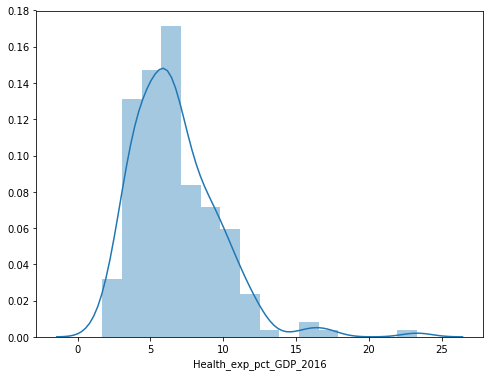

In [10]:
plt.figure(figsize=[8,6])
sns.distplot(WHS["Health_exp_pct_GDP_2016"])

In [11]:
#print(df[df["Country_Region"] =="US"].Province_State)
#print(df[df["Country_Region"] =="Italy"].Confirmed_Cases_X)


In [12]:
print(df[(df.Country_Region == "China") & (df.Province_State == "Hubei")].Confirmed_Cases_X)

62    [444.0, 549.0, 761.0, 1058.0, 1423.0, 3554.0, ...
Name: Confirmed_Cases_X, dtype: object


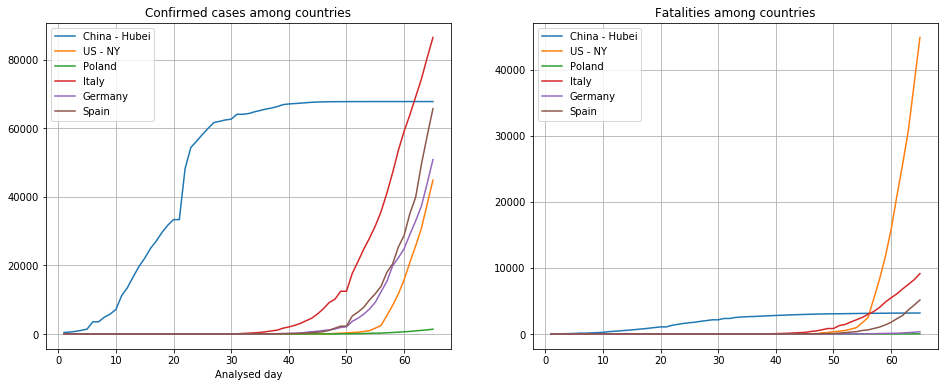

In [13]:
f, ax = plt.subplots(1, 2, figsize=[16, 6])
number_of_days = 66
countries_to_plot = ["Poland", "Italy", "Germany", "Spain"]

ax[0].plot(range(1, number_of_days), df[(df.Country_Region == "China") & (df.Province_State == "Hubei")].Confirmed_Cases_X.values[0], label = "China - Hubei")
ax[0].plot(range(1, number_of_days), df[(df.Country_Region == "US") & (df.Province_State == "New York")].Confirmed_Cases_X.values[0], label = "US - NY")
for country in countries_to_plot:
     ax[0].plot(range(1, number_of_days), df[df["Country_Region"] == country]["Confirmed_Cases_X"].values[0], label = country)
ax[0].set_title("Confirmed cases among countries")
ax[0].set_xlabel("Analysed day")
ax[0].legend()
ax[0].grid()

ax[1].plot(range(1, number_of_days), df[(df.Country_Region == "China") & (df.Province_State == "Hubei")].Fatalities_X.values[0], label = "China - Hubei")
ax[1].plot(range(1, number_of_days), df[(df.Country_Region == "US") & (df.Province_State == "New York")].Confirmed_Cases_X.values[0], label = "US - NY")
for country in countries_to_plot:
     ax[1].plot(range(1, number_of_days), df[df["Country_Region"] == country].Fatalities_X.values[0], label = country)
ax[1].set_title("Fatalities among countries")
ax[0].set_xlabel("Analysed day")
ax[1].legend()
ax[1].grid()

In [14]:
WHS.head(5)

,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_100000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,NaN,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,NaN,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,NaN,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN


In [15]:
for column in WHS:
    if column not in ["Country_Region", "Province_State", "World_Bank_Name"]:
        WHS[column] = WHS[column].fillna(np.nanmean(WHS[column]))
#print(sum(WHS.World_Bank_Name == "China"))

In [16]:
print(set(df.Country_Region.unique()) ^ set(target_value.Country_Region.unique()))
print(set(df.Province_State.unique()) ^ set(target_value.Province_State.unique()))

set()
set()


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense, Dropout, LSTM, Concatenate, LeakyReLU, Flatten
from keras.activations import relu
from keras.losses import mean_absolute_error, mean_squared_error, hinge, mean_absolute_percentage_error, mean_squared_logarithmic_error
from keras.callbacks.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from keras.backend import clear_session


Using TensorFlow backend.


In [18]:
# X_features = df.drop(columns=["Country_Region","Confirmed_Cases_X", "Fatalities_X", "Province_State", "World_Bank_Name", "Id", "Date", "ConfirmedCases", "Fatalities", "CF_Vector"], axis=1)
# X_vector = np.asarray(df["CF_Vector"])
# y_cases = df[["ConfirmedCases"]]
# y_fatalities = df[["Fatalities"]]

In [19]:
#WHS_mapped = Fatalities_df.merge(WHS, on=["World_Bank_Name"], how="left");
WHS_mapped_c = Cases_df.merge(WHS, on=["World_Bank_Name"], how="left");
WHS_mapped_c.columns
#print(WHS_mapped_f.shape, WHS_mapped_c.shape); WHS_mapped_f.head(5)

Index(['Province_State_x', 'World_Bank_Name', 'day_1', 'day_10', 'day_11',
       'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18',
       'day_19', 'day_2', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_3', 'day_30',
       'day_31', 'day_32', 'day_33', 'day_34', 'day_35', 'day_36', 'day_37',
       'day_38', 'day_39', 'day_4', 'day_40', 'day_41', 'day_42', 'day_43',
       'day_44', 'day_45', 'day_46', 'day_47', 'day_48', 'day_49', 'day_5',
       'day_50', 'day_51', 'day_52', 'day_53', 'day_54', 'day_55', 'day_56',
       'day_57', 'day_58', 'day_59', 'day_6', 'day_60', 'day_61', 'day_62',
       'day_63', 'day_64', 'day_65', 'day_7', 'day_8', 'day_9',
       'Country_Region', 'Province_State_y', 'Health_exp_pct_GDP_2016',
       'Health_exp_public_pct_2016', 'Health_exp_out_of_pocket_pct_2016',
       'Health_exp_per_capita_USD_2016', 'per_capita_exp_PPP_2016',
       'External_health_exp_pct_2016

In [20]:
WHS_mapped_c.columns

Index(['Province_State_x', 'World_Bank_Name', 'day_1', 'day_10', 'day_11',
       'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18',
       'day_19', 'day_2', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_3', 'day_30',
       'day_31', 'day_32', 'day_33', 'day_34', 'day_35', 'day_36', 'day_37',
       'day_38', 'day_39', 'day_4', 'day_40', 'day_41', 'day_42', 'day_43',
       'day_44', 'day_45', 'day_46', 'day_47', 'day_48', 'day_49', 'day_5',
       'day_50', 'day_51', 'day_52', 'day_53', 'day_54', 'day_55', 'day_56',
       'day_57', 'day_58', 'day_59', 'day_6', 'day_60', 'day_61', 'day_62',
       'day_63', 'day_64', 'day_65', 'day_7', 'day_8', 'day_9',
       'Country_Region', 'Province_State_y', 'Health_exp_pct_GDP_2016',
       'Health_exp_public_pct_2016', 'Health_exp_out_of_pocket_pct_2016',
       'Health_exp_per_capita_USD_2016', 'per_capita_exp_PPP_2016',
       'External_health_exp_pct_2016

In [21]:
for column in WHS_mapped_c:
    if "day" in column or column in ["Province_State_x", "World_Bank_Name", "Country_Region", "Province_State_y"]:
        WHS_mapped_c = WHS_mapped_c.drop(column, axis=1)
        
#hep_mean = np.nanmean(WHS_mapped_c["Health_exp_pct_GDP_2016"])
#WHS_mapped_c = WHS_mapped_c["Health_exp_pct_GDP_2016"].fillna(np.nanmean(hep_mean))   

In [22]:
for column in WHS_mapped_c:        
    mean = np.nanmean(WHS_mapped_c[column])
    #WHS_mean = np.nanmean(WHS_mapped_c[column])
    WHS_mapped_c[column] = WHS_mapped_c[column].fillna(mean)

In [23]:
# for column in WHS_mapped_c:
#     if column not in ["Country_Region", "Province_State", "World_Bank_Name"]:
#         WHS_mapped_c[column] = WHS_mapped_c[column].fillna(np.nanmean(WHS_mapped_c[column]))

In [24]:
print(WHS_mapped_c.shape); WHS_mapped_c.head(5)

(290, 11)


,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_100000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,10.2,5.1,77.4,57.2,162.8,17.500000,0.3,0.3,0.000000,42.3,89.309346
1,6.7,41.4,58.0,271.5,759.7,0.700000,1.2,3.6,11.600000,98.4,53.000000
2,6.6,67.7,30.9,260.4,998.2,0.000000,1.8,2.2,12.100000,100.0,89.309346
3,10.4,49.1,41.7,3834.7,4978.7,9.116766,3.3,4.0,83.100000,100.0,80.000000
4,2.9,44.1,35.2,95.2,185.8,3.600000,0.2,1.3,37.937143,25.0,89.309346


In [25]:
X_fatalities = Fatalities_df.drop(["Province_State", "World_Bank_Name", "day_65"], axis=1)
X_cases = Cases_df.drop(["Province_State", "World_Bank_Name", "day_65"], axis=1)

y_fatalities = Fatalities_df[["day_65"]]
y_cases = Fatalities_df[["day_65"]]; print(X_fatalities.shape, X_cases.shape, y_fatalities.shape, y_cases.shape)

(290, 64) (290, 64) (290, 1) (290, 1)


In [26]:
scaler = MinMaxScaler()
X_fatalities = scaler.fit_transform(X_fatalities)
X_cases = scaler.fit_transform(X_cases); print(X_fatalities.shape, X_cases.shape, y_fatalities.shape, y_cases.shape)

(290, 64) (290, 64) (290, 1) (290, 1)


In [27]:
X_fatalities = X_fatalities.reshape(290, 1, 64)
X_cases = X_cases.reshape(290, 1, 64)

In [28]:
LSTM_1_input_layer = Input(shape=(1, 64)) ##(2,1)
LSTM_1 = LSTM(64, return_sequences=True, recurrent_dropout=0.2)(LSTM_1_input_layer)
LSTM_1_dropout = Dropout(0.2)(LSTM_1)

LSTM_2_input_layer = Input(shape=(1, 64)) ##(2,1)
LSTM_2 = LSTM(64, return_sequences=True, recurrent_dropout=0.2)(LSTM_2_input_layer)
LSTM_2_dropout = Dropout(0.2)(LSTM_2)

WHS_input_layer = Input(shape=(11,))
WHS = Dense(64)(WHS_input_layer)
WHS_dropout = Dropout(0.3)(WHS)


rnn_c = LSTM(32)(LSTM_1_dropout)
concat_c = Concatenate(axis=-1)([rnn_c, WHS_dropout])
dense_c = Dense(128)(concat_c)
dropout_c = Dropout(0.3)(dense_c)
cases = Dense(1, activation=LeakyReLU(alpha=0.1),name="cases")(dropout_c)


rnn_f = LSTM(32)(LSTM_2_dropout)
concat_f = Concatenate(axis=-1)([rnn_f, WHS_dropout])
dense_f = Dense(128)(concat_f)
dropout_f = Dropout(0.3)(dense_f)
fatalities = Dense(1, activation=LeakyReLU(alpha=0.1), name="fatalities")(dropout_f)


model = Model([LSTM_1_input_layer, LSTM_2_input_layer, WHS_input_layer], [cases, fatalities])

model.summary()

model.compile(loss=[mean_absolute_error, mean_absolute_error], optimizer='adam')



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1, 64)        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1, 64)        0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 1, 64)        33024       input_1[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 11)           0                                            
____________________________________________________________________________________________

In [29]:
#callbacks = [EarlyStopping(monitor="loss", patience=100), ReduceLROnPlateau(monitor="loss", patience=5)]

Mean Absolute Error (MAE) is another loss function used for regression models. MAE is the sum of absolute differences between our target and predicted variables. So it measures the average magnitude of errors in a set of predictions, without considering their directions. (If we consider directions also, that would be called Mean Bias Error (MBE), which is a sum of residuals/errors). The range is also 0 to ∞.


In [31]:
history = model.fit([X_cases, X_fatalities, WHS_mapped_c],[y_cases, y_fatalities], 
                    epochs=1000, batch_size=4)#, callbacks=callbacks)

Epoch 1/1000
290/290 [==============================] - 3s 10ms/step - loss: 334.4733 - cases_loss: 179.3556 - fatalities_loss: 153.7011
Epoch 2/1000
290/290 [==============================] - 1s 2ms/step - loss: 296.1498 - cases_loss: 144.3518 - fatalities_loss: 151.1408
Epoch 3/1000
290/290 [==============================] - 1s 2ms/step - loss: 271.8347 - cases_loss: 142.0076 - fatalities_loss: 129.0151
Epoch 4/1000
290/290 [==============================] - 1s 2ms/step - loss: 264.0894 - cases_loss: 129.9035 - fatalities_loss: 132.7026
Epoch 5/1000
290/290 [==============================] - 1s 2ms/step - loss: 252.7669 - cases_loss: 127.0449 - fatalities_loss: 124.2023
Epoch 6/1000
290/290 [==============================] - 0s 2ms/step - loss: 231.4398 - cases_loss: 114.4953 - fatalities_loss: 115.5016
Epoch 7/1000
290/290 [==============================] - 1s 2ms/step - loss: 223.9537 - cases_loss: 112.4568 - fatalities_loss: 110.3573
Epoch 8/1000
290/290 [=========================

290/290 [==============================] - 1s 2ms/step - loss: 153.0999 - cases_loss: 76.5936 - fatalities_loss: 75.5427
Epoch 62/1000
290/290 [==============================] - 0s 2ms/step - loss: 153.7121 - cases_loss: 77.2135 - fatalities_loss: 75.4924
Epoch 63/1000
290/290 [==============================] - 0s 2ms/step - loss: 155.1438 - cases_loss: 77.5318 - fatalities_loss: 76.5829
Epoch 64/1000
290/290 [==============================] - 0s 2ms/step - loss: 153.9578 - cases_loss: 77.4086 - fatalities_loss: 75.8055
Epoch 65/1000
290/290 [==============================] - 0s 2ms/step - loss: 153.1973 - cases_loss: 77.1124 - fatalities_loss: 75.0692
Epoch 66/1000
290/290 [==============================] - 0s 2ms/step - loss: 154.3907 - cases_loss: 77.2427 - fatalities_loss: 76.1694
Epoch 67/1000
290/290 [==============================] - 0s 2ms/step - loss: 156.1109 - cases_loss: 78.9792 - fatalities_loss: 76.2685
Epoch 68/1000
290/290 [==============================] - 0s 2ms/step 

290/290 [==============================] - 1s 3ms/step - loss: 147.4229 - cases_loss: 73.1470 - fatalities_loss: 73.3161
Epoch 122/1000
290/290 [==============================] - 1s 3ms/step - loss: 149.0433 - cases_loss: 75.4940 - fatalities_loss: 72.6497
Epoch 123/1000
290/290 [==============================] - 1s 3ms/step - loss: 145.5989 - cases_loss: 73.0924 - fatalities_loss: 71.7058
Epoch 124/1000
290/290 [==============================] - 1s 3ms/step - loss: 147.4463 - cases_loss: 74.7532 - fatalities_loss: 71.7625
Epoch 125/1000
290/290 [==============================] - 1s 2ms/step - loss: 146.0426 - cases_loss: 73.4890 - fatalities_loss: 71.6882
Epoch 126/1000
290/290 [==============================] - 1s 2ms/step - loss: 145.4342 - cases_loss: 73.4330 - fatalities_loss: 71.1502
Epoch 127/1000
290/290 [==============================] - 1s 2ms/step - loss: 146.8597 - cases_loss: 74.0593 - fatalities_loss: 71.9582
Epoch 128/1000
290/290 [==============================] - 0s 2m

290/290 [==============================] - 0s 2ms/step - loss: 135.5103 - cases_loss: 70.5502 - fatalities_loss: 64.2525
Epoch 182/1000
290/290 [==============================] - 0s 2ms/step - loss: 138.5630 - cases_loss: 72.5473 - fatalities_loss: 65.2299
Epoch 183/1000
290/290 [==============================] - 0s 2ms/step - loss: 135.9046 - cases_loss: 70.3828 - fatalities_loss: 64.6589
Epoch 184/1000
290/290 [==============================] - 0s 2ms/step - loss: 136.8077 - cases_loss: 71.3147 - fatalities_loss: 64.8579
Epoch 185/1000
290/290 [==============================] - 0s 1ms/step - loss: 135.7983 - cases_loss: 70.3344 - fatalities_loss: 64.9197
Epoch 186/1000
290/290 [==============================] - 0s 1ms/step - loss: 135.1427 - cases_loss: 71.9432 - fatalities_loss: 62.5818
Epoch 187/1000
290/290 [==============================] - 0s 1ms/step - loss: 138.4243 - cases_loss: 70.7309 - fatalities_loss: 66.8871
Epoch 188/1000
290/290 [==============================] - 0s 1m

290/290 [==============================] - 0s 2ms/step - loss: 112.6105 - cases_loss: 66.3617 - fatalities_loss: 45.6284
Epoch 242/1000
290/290 [==============================] - 0s 2ms/step - loss: 116.6881 - cases_loss: 69.9758 - fatalities_loss: 46.3811
Epoch 243/1000
290/290 [==============================] - 0s 2ms/step - loss: 123.8317 - cases_loss: 68.5547 - fatalities_loss: 54.8653
Epoch 244/1000
290/290 [==============================] - 0s 2ms/step - loss: 112.1295 - cases_loss: 67.6344 - fatalities_loss: 43.7900
Epoch 245/1000
290/290 [==============================] - 0s 2ms/step - loss: 111.4947 - cases_loss: 62.7582 - fatalities_loss: 48.0277
Epoch 246/1000
290/290 [==============================] - 0s 2ms/step - loss: 112.2935 - cases_loss: 68.6819 - fatalities_loss: 42.9220
Epoch 247/1000
290/290 [==============================] - 0s 2ms/step - loss: 112.6320 - cases_loss: 65.8818 - fatalities_loss: 46.1700
Epoch 248/1000
290/290 [==============================] - 0s 2m

290/290 [==============================] - 1s 2ms/step - loss: 87.1496 - cases_loss: 52.3564 - fatalities_loss: 34.3459
Epoch 302/1000
290/290 [==============================] - 0s 2ms/step - loss: 96.2716 - cases_loss: 55.0568 - fatalities_loss: 40.6251
Epoch 303/1000
290/290 [==============================] - 0s 2ms/step - loss: 93.4418 - cases_loss: 53.8939 - fatalities_loss: 39.1750
Epoch 304/1000
290/290 [==============================] - 0s 2ms/step - loss: 96.3487 - cases_loss: 55.3038 - fatalities_loss: 40.4766
Epoch 305/1000
290/290 [==============================] - 0s 2ms/step - loss: 94.4549 - cases_loss: 52.0223 - fatalities_loss: 41.9449
Epoch 306/1000
290/290 [==============================] - 0s 1ms/step - loss: 85.1049 - cases_loss: 49.5551 - fatalities_loss: 35.0671
Epoch 307/1000
290/290 [==============================] - 0s 2ms/step - loss: 90.2285 - cases_loss: 63.3418 - fatalities_loss: 40.2293
Epoch 308/1000
290/290 [==============================] - 0s 2ms/step 

290/290 [==============================] - 1s 3ms/step - loss: 81.0189 - cases_loss: 49.9507 - fatalities_loss: 30.5618
Epoch 362/1000
290/290 [==============================] - 1s 3ms/step - loss: 86.9526 - cases_loss: 50.2532 - fatalities_loss: 36.4449
Epoch 363/1000
290/290 [==============================] - 1s 3ms/step - loss: 85.7236 - cases_loss: 54.3802 - fatalities_loss: 30.8522
Epoch 364/1000
290/290 [==============================] - 1s 4ms/step - loss: 84.9230 - cases_loss: 47.8886 - fatalities_loss: 37.1666
Epoch 365/1000
290/290 [==============================] - 1s 3ms/step - loss: 84.0904 - cases_loss: 50.4250 - fatalities_loss: 33.2499
Epoch 366/1000
290/290 [==============================] - 1s 2ms/step - loss: 88.3707 - cases_loss: 54.9874 - fatalities_loss: 33.4524
Epoch 367/1000
290/290 [==============================] - 1s 2ms/step - loss: 89.5603 - cases_loss: 55.3930 - fatalities_loss: 34.0563
Epoch 368/1000
290/290 [==============================] - 1s 2ms/step 

290/290 [==============================] - 0s 1ms/step - loss: 80.8950 - cases_loss: 47.8846 - fatalities_loss: 32.5518
Epoch 422/1000
290/290 [==============================] - 0s 1ms/step - loss: 82.5233 - cases_loss: 52.7888 - fatalities_loss: 29.2415
Epoch 423/1000
290/290 [==============================] - 0s 2ms/step - loss: 78.5783 - cases_loss: 48.3914 - fatalities_loss: 29.7234
Epoch 424/1000
290/290 [==============================] - 0s 2ms/step - loss: 81.6183 - cases_loss: 50.8505 - fatalities_loss: 30.3592
Epoch 425/1000
290/290 [==============================] - 1s 2ms/step - loss: 81.4783 - cases_loss: 49.0301 - fatalities_loss: 32.0175
Epoch 426/1000
290/290 [==============================] - 0s 2ms/step - loss: 77.0276 - cases_loss: 50.4182 - fatalities_loss: 26.2327
Epoch 427/1000
290/290 [==============================] - 1s 2ms/step - loss: 76.9142 - cases_loss: 46.8332 - fatalities_loss: 29.9819
Epoch 428/1000
290/290 [==============================] - 0s 2ms/step 

290/290 [==============================] - 0s 1ms/step - loss: 70.3335 - cases_loss: 39.7972 - fatalities_loss: 30.2605
Epoch 482/1000
290/290 [==============================] - 0s 1ms/step - loss: 69.9462 - cases_loss: 40.7877 - fatalities_loss: 28.8024
Epoch 483/1000
290/290 [==============================] - 0s 2ms/step - loss: 64.1096 - cases_loss: 40.1032 - fatalities_loss: 23.6179
Epoch 484/1000
290/290 [==============================] - 0s 2ms/step - loss: 63.9639 - cases_loss: 34.5241 - fatalities_loss: 29.1744
Epoch 485/1000
290/290 [==============================] - 0s 1ms/step - loss: 76.0602 - cases_loss: 43.3410 - fatalities_loss: 32.3788
Epoch 486/1000
290/290 [==============================] - 0s 1ms/step - loss: 71.8577 - cases_loss: 44.9789 - fatalities_loss: 26.6681
Epoch 487/1000
290/290 [==============================] - 0s 1ms/step - loss: 68.3860 - cases_loss: 38.7325 - fatalities_loss: 29.4558
Epoch 488/1000
290/290 [==============================] - 0s 1ms/step 

290/290 [==============================] - 1s 2ms/step - loss: 64.7782 - cases_loss: 35.6571 - fatalities_loss: 28.7634
Epoch 542/1000
290/290 [==============================] - 1s 2ms/step - loss: 55.9872 - cases_loss: 31.1439 - fatalities_loss: 24.9345
Epoch 543/1000
290/290 [==============================] - 1s 2ms/step - loss: 70.7990 - cases_loss: 40.9127 - fatalities_loss: 32.1778
Epoch 544/1000
290/290 [==============================] - 1s 2ms/step - loss: 68.8274 - cases_loss: 41.2953 - fatalities_loss: 27.2407
Epoch 545/1000
290/290 [==============================] - 0s 2ms/step - loss: 68.7983 - cases_loss: 34.6858 - fatalities_loss: 34.1856
Epoch 546/1000
290/290 [==============================] - 0s 2ms/step - loss: 65.6962 - cases_loss: 33.6172 - fatalities_loss: 31.7581
Epoch 547/1000
290/290 [==============================] - 1s 2ms/step - loss: 61.4134 - cases_loss: 33.9432 - fatalities_loss: 27.3675
Epoch 548/1000
290/290 [==============================] - 1s 2ms/step 

290/290 [==============================] - 0s 1ms/step - loss: 76.1494 - cases_loss: 41.1736 - fatalities_loss: 34.5630
Epoch 602/1000
290/290 [==============================] - 1s 2ms/step - loss: 64.6957 - cases_loss: 36.6312 - fatalities_loss: 28.7390
Epoch 603/1000
290/290 [==============================] - 0s 1ms/step - loss: 61.9452 - cases_loss: 30.8137 - fatalities_loss: 30.7977
Epoch 604/1000
290/290 [==============================] - 0s 1ms/step - loss: 53.5523 - cases_loss: 25.4195 - fatalities_loss: 27.8808
Epoch 605/1000
290/290 [==============================] - 0s 1ms/step - loss: 64.4079 - cases_loss: 32.2077 - fatalities_loss: 31.8811
Epoch 606/1000
290/290 [==============================] - 0s 1ms/step - loss: 65.5091 - cases_loss: 32.5867 - fatalities_loss: 32.6694
Epoch 607/1000
290/290 [==============================] - 0s 1ms/step - loss: 52.4471 - cases_loss: 28.8278 - fatalities_loss: 23.3045
Epoch 608/1000
290/290 [==============================] - 0s 1ms/step 

290/290 [==============================] - 1s 2ms/step - loss: 55.9716 - cases_loss: 29.5528 - fatalities_loss: 26.3446
Epoch 662/1000
290/290 [==============================] - 1s 2ms/step - loss: 56.5756 - cases_loss: 26.3892 - fatalities_loss: 30.1762
Epoch 663/1000
290/290 [==============================] - 1s 2ms/step - loss: 59.1766 - cases_loss: 32.0318 - fatalities_loss: 31.5539ETA: 0s - loss: 103.5973 - cases_loss: 25.1841 - fatalities_loss
Epoch 664/1000
290/290 [==============================] - 1s 2ms/step - loss: 46.1682 - cases_loss: 20.7663 - fatalities_loss: 25.2431
Epoch 665/1000
290/290 [==============================] - 1s 2ms/step - loss: 58.5278 - cases_loss: 30.7882 - fatalities_loss: 27.4051
Epoch 666/1000
290/290 [==============================] - 1s 2ms/step - loss: 58.3948 - cases_loss: 30.6015 - fatalities_loss: 27.4699
Epoch 667/1000
290/290 [==============================] - 1s 2ms/step - loss: 55.1784 - cases_loss: 31.5124 - fatalities_loss: 23.4565
Epoch 

290/290 [==============================] - 1s 2ms/step - loss: 54.3098 - cases_loss: 29.5299 - fatalities_loss: 24.4440
Epoch 721/1000
290/290 [==============================] - 1s 2ms/step - loss: 50.0822 - cases_loss: 25.7728 - fatalities_loss: 24.0477
Epoch 722/1000
290/290 [==============================] - 1s 2ms/step - loss: 58.5062 - cases_loss: 27.1159 - fatalities_loss: 31.0821
Epoch 723/1000
290/290 [==============================] - 1s 3ms/step - loss: 43.6577 - cases_loss: 16.5656 - fatalities_loss: 26.8215
Epoch 724/1000
290/290 [==============================] - 1s 3ms/step - loss: 61.7920 - cases_loss: 32.8836 - fatalities_loss: 28.6741
Epoch 725/1000
290/290 [==============================] - 1s 3ms/step - loss: 48.9201 - cases_loss: 21.6305 - fatalities_loss: 27.3136
Epoch 726/1000
290/290 [==============================] - 0s 1ms/step - loss: 52.9419 - cases_loss: 27.2071 - fatalities_loss: 25.9133
Epoch 727/1000
290/290 [==============================] - 0s 1ms/step 

290/290 [==============================] - 0s 1ms/step - loss: 48.0828 - cases_loss: 23.5861 - fatalities_loss: 24.5528
Epoch 781/1000
290/290 [==============================] - 0s 1ms/step - loss: 52.6651 - cases_loss: 23.7292 - fatalities_loss: 28.8427
Epoch 782/1000
290/290 [==============================] - 0s 1ms/step - loss: 55.8739 - cases_loss: 26.0985 - fatalities_loss: 29.8612
Epoch 783/1000
290/290 [==============================] - 0s 1ms/step - loss: 57.0869 - cases_loss: 23.6832 - fatalities_loss: 33.8070
Epoch 784/1000
290/290 [==============================] - 0s 1ms/step - loss: 45.6471 - cases_loss: 21.2295 - fatalities_loss: 24.1364
Epoch 785/1000
290/290 [==============================] - 0s 1ms/step - loss: 50.7662 - cases_loss: 24.2584 - fatalities_loss: 26.2209
Epoch 786/1000
290/290 [==============================] - 0s 1ms/step - loss: 50.3629 - cases_loss: 25.5082 - fatalities_loss: 24.6995
Epoch 787/1000
290/290 [==============================] - 0s 1ms/step 

290/290 [==============================] - 0s 1ms/step - loss: 58.0407 - cases_loss: 27.0297 - fatalities_loss: 31.1026
Epoch 841/1000
290/290 [==============================] - 0s 1ms/step - loss: 52.1140 - cases_loss: 25.5199 - fatalities_loss: 26.5287
Epoch 842/1000
290/290 [==============================] - 0s 2ms/step - loss: 51.7411 - cases_loss: 25.3705 - fatalities_loss: 26.3214
Epoch 843/1000
290/290 [==============================] - 0s 1ms/step - loss: 46.7917 - cases_loss: 19.3856 - fatalities_loss: 27.3274
Epoch 844/1000
290/290 [==============================] - 0s 1ms/step - loss: 51.4395 - cases_loss: 26.8782 - fatalities_loss: 24.3656
Epoch 845/1000
290/290 [==============================] - 0s 1ms/step - loss: 48.0406 - cases_loss: 20.3379 - fatalities_loss: 27.5084
Epoch 846/1000
290/290 [==============================] - 0s 2ms/step - loss: 52.2899 - cases_loss: 28.5163 - fatalities_loss: 24.2760
Epoch 847/1000
290/290 [==============================] - 0s 2ms/step 

290/290 [==============================] - 0s 1ms/step - loss: 40.1174 - cases_loss: 21.1383 - fatalities_loss: 18.8595
Epoch 901/1000
290/290 [==============================] - 0s 1ms/step - loss: 39.6580 - cases_loss: 23.6819 - fatalities_loss: 15.8014
Epoch 902/1000
290/290 [==============================] - 0s 1ms/step - loss: 42.5476 - cases_loss: 25.6669 - fatalities_loss: 17.1852
Epoch 903/1000
290/290 [==============================] - 0s 1ms/step - loss: 44.7875 - cases_loss: 24.9477 - fatalities_loss: 19.7166
Epoch 904/1000
290/290 [==============================] - 0s 1ms/step - loss: 48.8360 - cases_loss: 24.2192 - fatalities_loss: 24.3880
Epoch 905/1000
290/290 [==============================] - 0s 1ms/step - loss: 44.8105 - cases_loss: 22.9186 - fatalities_loss: 21.6649
Epoch 906/1000
290/290 [==============================] - 1s 2ms/step - loss: 40.7700 - cases_loss: 22.9680 - fatalities_loss: 18.0180
Epoch 907/1000
290/290 [==============================] - 0s 2ms/step 

290/290 [==============================] - 0s 2ms/step - loss: 48.9127 - cases_loss: 22.3110 - fatalities_loss: 26.7451
Epoch 961/1000
290/290 [==============================] - 0s 2ms/step - loss: 50.5184 - cases_loss: 26.4753 - fatalities_loss: 24.1188
Epoch 962/1000
290/290 [==============================] - 1s 2ms/step - loss: 39.3889 - cases_loss: 21.3856 - fatalities_loss: 18.5758
Epoch 963/1000
290/290 [==============================] - 0s 2ms/step - loss: 47.1347 - cases_loss: 30.3224 - fatalities_loss: 16.6060
Epoch 964/1000
290/290 [==============================] - 0s 2ms/step - loss: 38.5442 - cases_loss: 19.8777 - fatalities_loss: 18.6710
Epoch 965/1000
290/290 [==============================] - 0s 1ms/step - loss: 41.8955 - cases_loss: 22.8244 - fatalities_loss: 18.9128
Epoch 966/1000
290/290 [==============================] - 0s 1ms/step - loss: 33.6104 - cases_loss: 15.3734 - fatalities_loss: 18.0806
Epoch 967/1000
290/290 [==============================] - 0s 2ms/step 

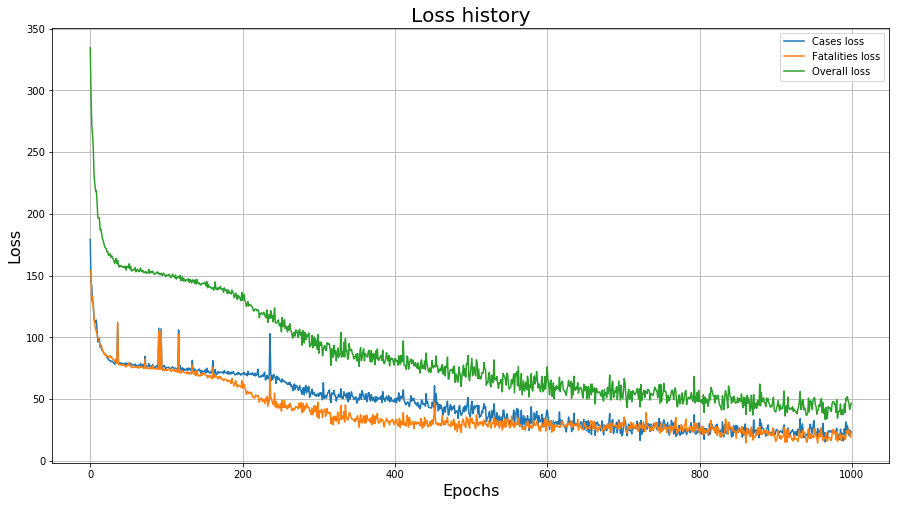

In [40]:
plt.figure(figsize=[15,8])
plt.title("Loss history", fontsize=20)
plt.plot(history.history["cases_loss"], label="Cases loss")
plt.plot(history.history["fatalities_loss"], label="Fatalities loss")
plt.plot(history.history["loss"], label="Overall loss")
plt.xlabel("Epochs", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.legend()
plt.grid()

In [ ]:
clear_session()
print("Session cleared")